# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [18]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

In [19]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [20]:
# Combine the data into a single dataset
df =  pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
df.head()
# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
mice_count = df['Mouse ID'].nunique()
mice_count

249

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = df.loc[df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [28]:
clean_df = df.drop_duplicates(subset = ["Mouse ID","Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
mice_count = clean_df['Mouse ID'].nunique()
mice_count

249

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# This method produces everything in a single groupby function
summarystats = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume_Variance": variance, " Tumor Volume Std.Dev": stdv, "Tumor Volume Std.Err": sem})
summarystats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume_Variance,Tumor Volume Std.Dev,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# data to appear to the bar gragh to be generated
datapoint_plot = df.groupby(["Drug Regimen"]).count()["Timepoint"]
datapoint_plot

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

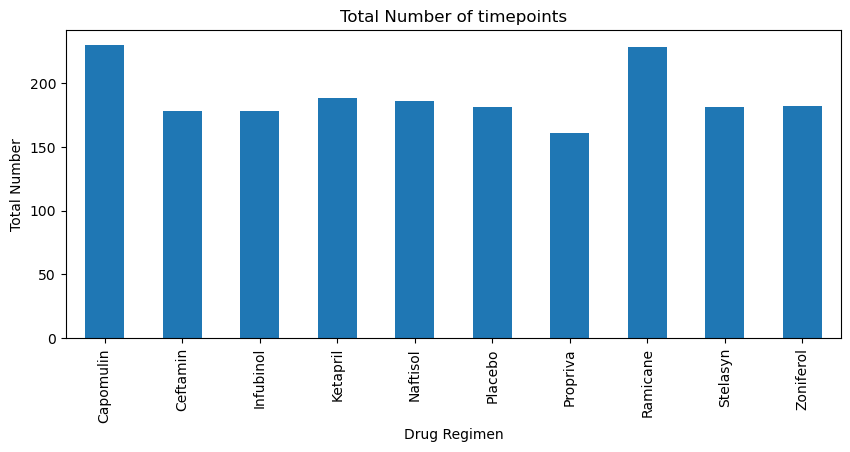

<Figure size 640x480 with 0 Axes>

In [33]:
datapoint_plot.plot(kind="bar", figsize=(10,4))

#set chart title
plt.title("Total Number of timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number")

#show chart and set layout
plt.show()
plt.tight_layout()

<function matplotlib.pyplot.legend(*args, **kwargs)>

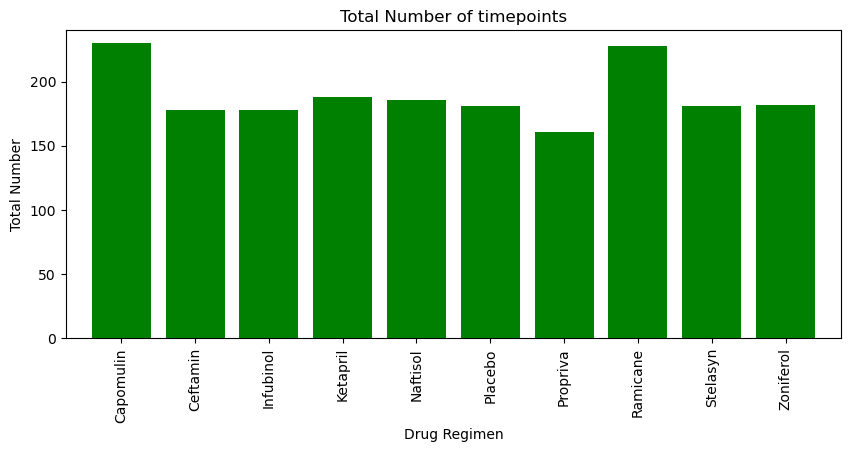

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(datapoint_plot))
tick_locations = [value for value in x_axis]

# Defining data to be generated
plt.figure(figsize=(10,4))
plt.bar(x_axis, datapoint_plot, color='g', alpha=1, align='center')
plt.xticks(tick_locations, datapoint_plot.index.values, rotation="vertical")

# Setting x and y limit
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(datapoint_plot)+10)

plt.title("Total Number of timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number")
plt.legend

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = df.groupby(["Sex"]).count()["Mouse ID"]
sex_distribution

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

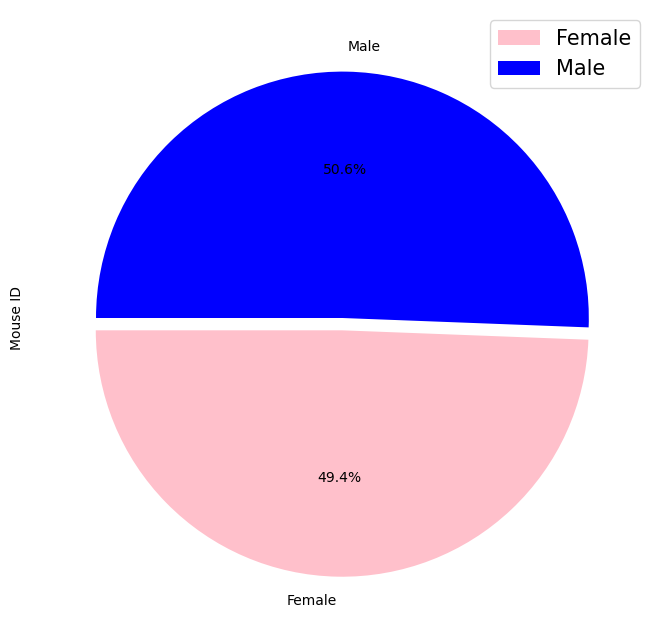

In [36]:
# Pie plot generation
colors = ['pink', 'blue']
explode = (0.05, 0)
panPie_plot = sex_distribution.plot.pie(y='Total Count',figsize=(8,8), colors = colors, startangle=180, explode = explode, autopct="%1.1f%%")
panPie_plot.legend(["Female", "Male"], prop={'size': 15})

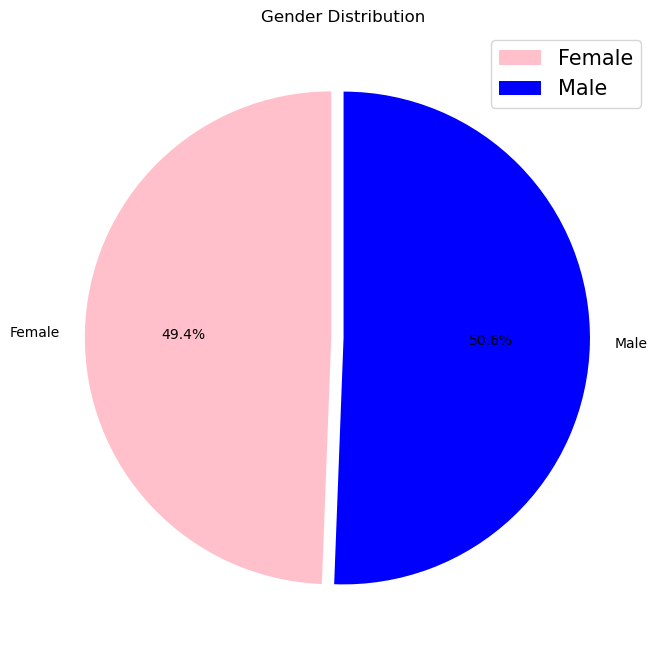

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ['pink', 'blue']
explode = (0.05, 0)
plt.pie(sex_distribution, explode=explode, labels=sex_distribution.index.values, colors=colors, autopct="%1.1f%%", startangle=90)
plt.rcParams['figure.figsize'] = (8,8)
plt.title('Gender Distribution')
plt.legend(["Female", "Male"], prop={'size': 15})


## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mouse_timepoint = df[df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
mouse_timepoint = mouse_timepoint.sort_values(["Timepoint"], ascending=True)
mouse_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
both_dataframe = mouse_timepoint.merge(df, on = ('Mouse ID', 'Timepoint'), how = 'left' )
both_dataframe
# Tumor volume at last timepoint
regimes_data = mouse_timepoint[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

# Selecting individual row by index
capomulin_data =df.loc[df["Drug Regimen"] == "Capomulin",:]
ramicane_data = df.loc[df["Drug Regimen"] == "Ramicane", :]
infubinol_data = df.loc[df["Drug Regimen"] == "Infubinol", :]
ceftamin_data = df.loc[df["Drug Regimen"] == "Ceftamin", :]
capomulin_data

#  Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_last = capomulin_data.groupby('Mouse ID').max()['Timepoint']
capomulin_last
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_vol
capomulin_merge = capomulin_vol.merge(df, on=("Mouse ID", "Timepoint"), how="left")
capomulin_merge

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tuvol = capomulin_merge['Tumor Volume (mm3)']
quartiles = tuvol.quantile([0.25,0.5,0.75])
capomulin_lowerq = quartiles[0.25]
capomulin_upperq = quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
print(f' IQR = {capomulin_iqr}')
print(f' Lower Quartile = {capomulin_lowerq}')
print(f' Upper Quartile = {capomulin_upperq}')
capomulin_lower_bound = capomulin_lowerq - 1.5*capomulin_iqr
capomulin_upper_bound = capomulin_upperq + 1.5*capomulin_iqr
print(f' Lower Bound: {capomulin_lower_bound}')
print(f' Upper Bound: {capomulin_upper_bound}')
capomulin_merge.describe()

print(f"Capomulin potential outliers could be values below {capomulin_lower_bound} and above {capomulin_upper_bound} could be outliers.")


 IQR = 7.781863460000004
 Lower Quartile = 32.37735684
 Upper Quartile = 40.1592203
 Lower Bound: 20.70456164999999
 Upper Bound: 51.83201549
Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [42]:
ramicane_last = ramicane_data.groupby('Mouse ID').max()['Timepoint']
ramicane_last
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_vol
ramicane_merge = ramicane_vol.merge(df, on=("Mouse ID", "Timepoint"), how="left")
ramicane_merge

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tuvol_1 = ramicane_merge['Tumor Volume (mm3)']
quartiles = tuvol_1.quantile([0.25,0.5,0.75])
ramicane_lowerq = quartiles[0.25]
ramicane_upperq = quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
print(f' IQR = {ramicane_iqr}')
print(f' Lower Quartile = {ramicane_lowerq}')
print(f' Upper Quartile = {ramicane_upperq}')
ramicane_lower_bound = ramicane_lowerq - 1.5*ramicane_iqr
ramicane_upper_bound = ramicane_upperq + 1.5*ramicane_iqr
print(f' Lower Bound: {ramicane_lower_bound}')
print(f' Upper Bound: {ramicane_upper_bound}')
ramicane_merge.describe()

print(f"ramicane potential outliers could be values below {ramicane_lower_bound} and above {ramicane_upper_bound} could be outliers.")

 IQR = 9.098536719999998
 Lower Quartile = 31.56046955
 Upper Quartile = 40.65900627
 Lower Bound: 17.912664470000003
 Upper Bound: 54.30681135
ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [43]:
infubinol_last = infubinol_data.groupby('Mouse ID').max()['Timepoint']
infubinol_last
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_vol
infubinol_merge = infubinol_vol.merge(df, on=("Mouse ID", "Timepoint"), how="left")
infubinol_merge

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tuvol_2 = infubinol_merge['Tumor Volume (mm3)']
quartiles = tuvol_2.quantile([0.25,0.5,0.75])
infubinol_lowerq = quartiles[0.25]
infubinol_upperq = quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
print(f' IQR = {infubinol_iqr}')
print(f' Lower Quartile = {infubinol_lowerq}')
print(f' Upper Quartile = {infubinol_upperq}')
infubinol_lower_bound = infubinol_lowerq - 1.5*infubinol_iqr
infubinol_upper_bound = infubinol_upperq + 1.5*infubinol_iqr
print(f' Lower Bound: {infubinol_lower_bound}')
print(f' Upper Bound: {infubinol_upper_bound}')
infubinol_merge.describe()

print(f"infubinol potential outliers could be values below {infubinol_lower_bound} and above {infubinol_upper_bound} could be outliers.")


 IQR = 11.477135160000003
 Lower Quartile = 54.04860769
 Upper Quartile = 65.52574285
 Lower Bound: 36.83290494999999
 Upper Bound: 82.74144559000001
infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [44]:
ceftamin_last = ceftamin_data.groupby('Mouse ID').max()['Timepoint']
ceftamin_last
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_vol
ceftamin_merge = ceftamin_vol.merge(df, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_merge

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tuvol_3 = ceftamin_merge['Tumor Volume (mm3)']
quartiles = tuvol_3.quantile([0.25,0.5,0.75])
ceftamin_lowerq = quartiles[0.25]
ceftamin_upperq = quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
print(f' IQR = {ceftamin_iqr}')
print(f' Lower Quartile = {ceftamin_lowerq}')
print(f' Upper Quartile = {ceftamin_upperq}')
ceftamin_lower_bound = ceftamin_lowerq - 1.5*ceftamin_iqr
ceftamin_upper_bound = ceftamin_upperq + 1.5*ceftamin_iqr
print(f' Lower Bound: {ceftamin_lower_bound}')
print(f' Upper Bound: {ceftamin_upper_bound}')
ceftamin_merge.describe()

print(f"ceftamin potential outliers could be values below {ceftamin_lower_bound} and above {ceftamin_upper_bound} could be outliers.")


 IQR = 15.577752179999997
 Lower Quartile = 48.72207785
 Upper Quartile = 64.29983003
 Lower Bound: 25.355449580000002
 Upper Bound: 87.66645829999999
ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


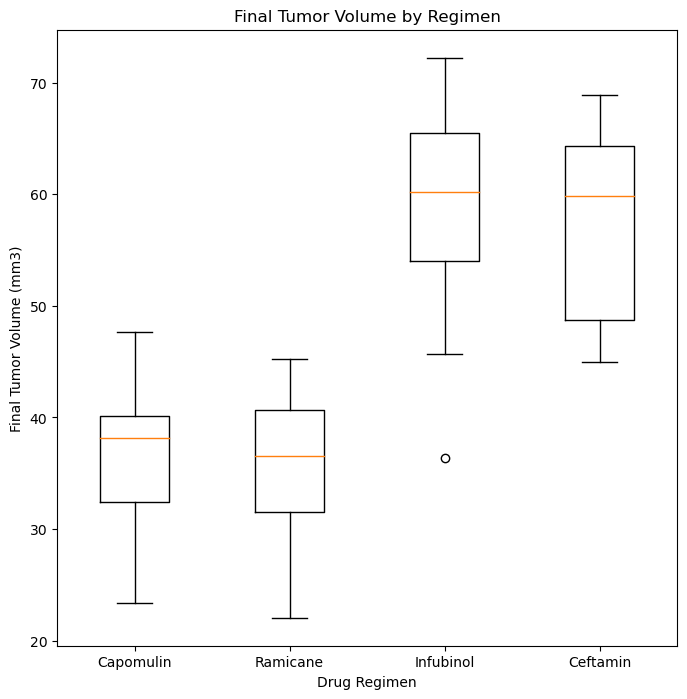

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_plot = [tuvol, tuvol_1, tuvol_2, tuvol_3]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(treatment_plot,labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

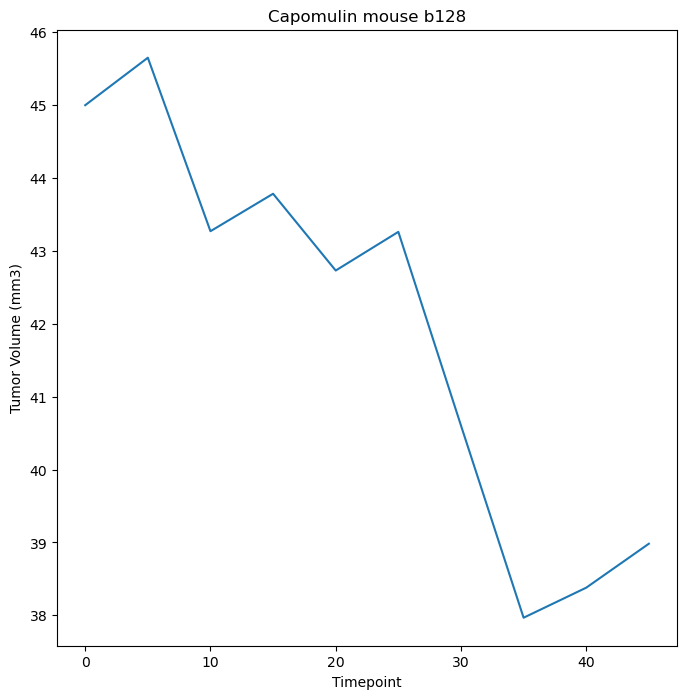

In [46]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

def get_line_plot(regimen, mouse_id):
    regimen_data = df.loc[df["Drug Regimen"] == regimen]
    data_by_id = regimen_data.loc[regimen_data['Mouse ID'] == mouse_id]
    plt.plot(data_by_id['Timepoint'], data_by_id['Tumor Volume (mm3)'])
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')
    plt.title(regimen + " mouse " + mouse_id)
    plt.show()
    
get_line_plot("Capomulin", "b128")

Text(0.5, 1.0, 'Weight Versus Average Tumor Volume for Capomulin')

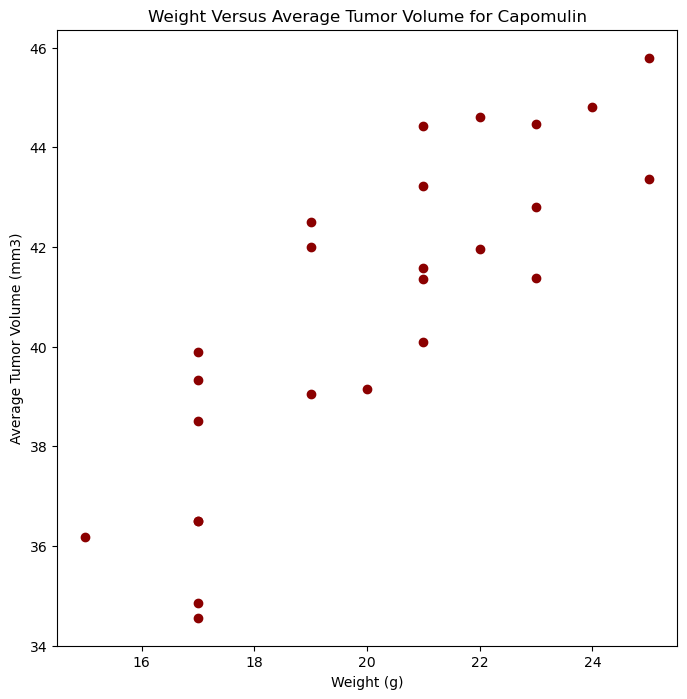

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_plot = df.loc[(df["Drug Regimen"] == "Capomulin")]
scatter_plot

scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()
scatter_plot_df

# set x and y value
weight_scatter_plot = scatter_plot_df["Weight (g)"]
volume_scatter_plot = scatter_plot_df["Tumor Volume (mm3)"]

# Plot the graph
plt.scatter(weight_scatter_plot, volume_scatter_plot, color = "darkred")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight Versus Average Tumor Volume for Capomulin")


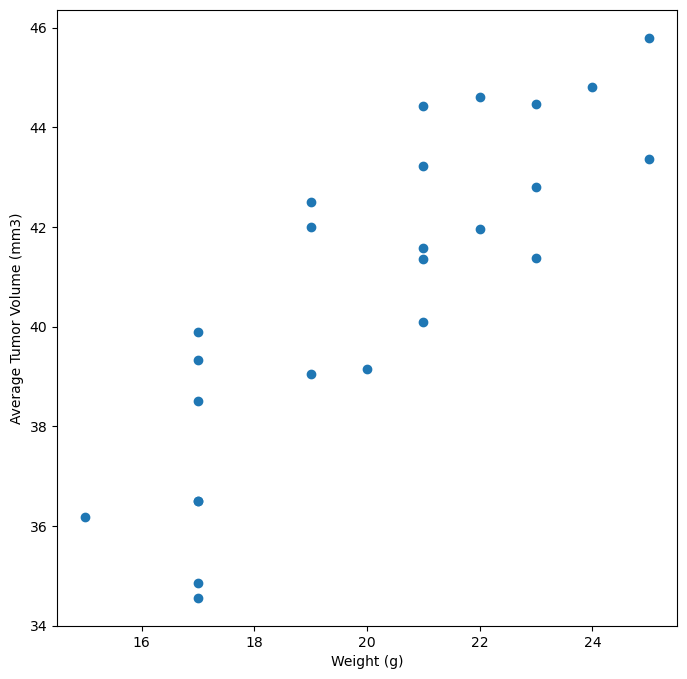

In [48]:
def generate_scatter_plot(regimen):
    regimen_data = df.loc[df['Drug Regimen'] == regimen]
    averages = regimen_data.groupby(['Mouse ID']).mean()
    plt.scatter(averages['Weight (g)'], averages['Tumor Volume (mm3)'])
    plt.xlabel('Weight (g)')
    plt.ylabel('Average Tumor Volume (mm3)')
    plt.show()
    return averages
cap_averages = generate_scatter_plot("Capomulin")

## Correlation and Regression

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f' The correlation coefficient between weight and tumor volume is {round(st.pearsonr(weight_scatter_plot, volume_scatter_plot)[0],2)}')

 The correlation coefficient between weight and tumor volume is 0.84


In [51]:
# Linear regression model
linear_representation = st.linregress(scatter_plot_df['Weight (g)'], scatter_plot_df['Tumor Volume (mm3)'])
linear_representation

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

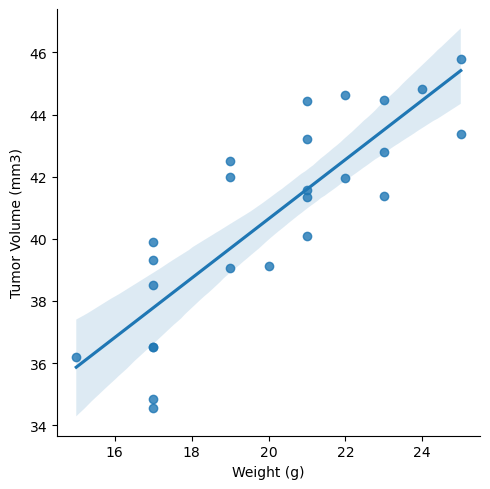

In [53]:
coefficient = sns.lmplot(x='Weight (g)',y='Tumor Volume (mm3)', data=cap_averages, fit_reg=True)
plt.savefig('lmplot')
plt.show()